In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

In [58]:
data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data sets\Dry_Bean_Dataset.csv")

In [59]:
data

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

## Basic EDA

In [60]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [62]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [63]:
fv=data.iloc[:,:16]
cv=data.iloc[:,-1]

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\li

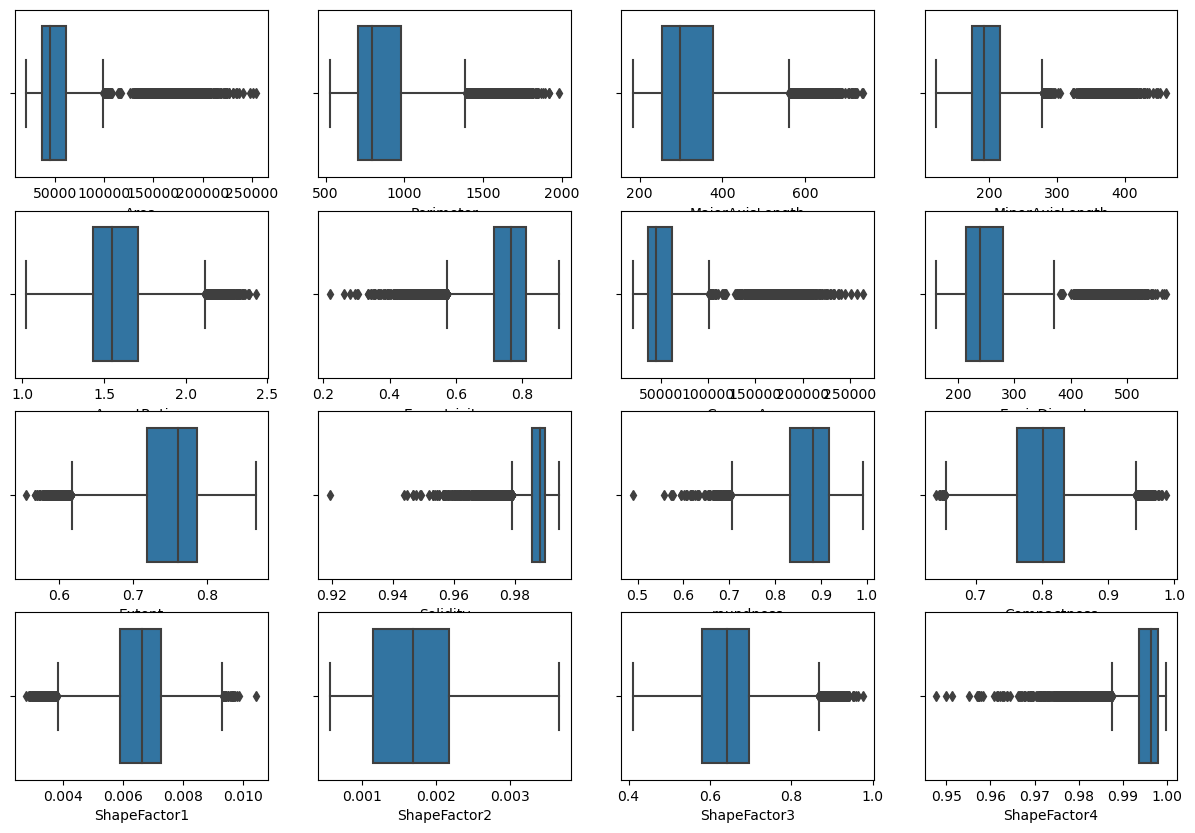

In [64]:

plt.figure(figsize=(15,10))
for i,column in enumerate(fv.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(fv[column])
plt.show()
    
    

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\ana

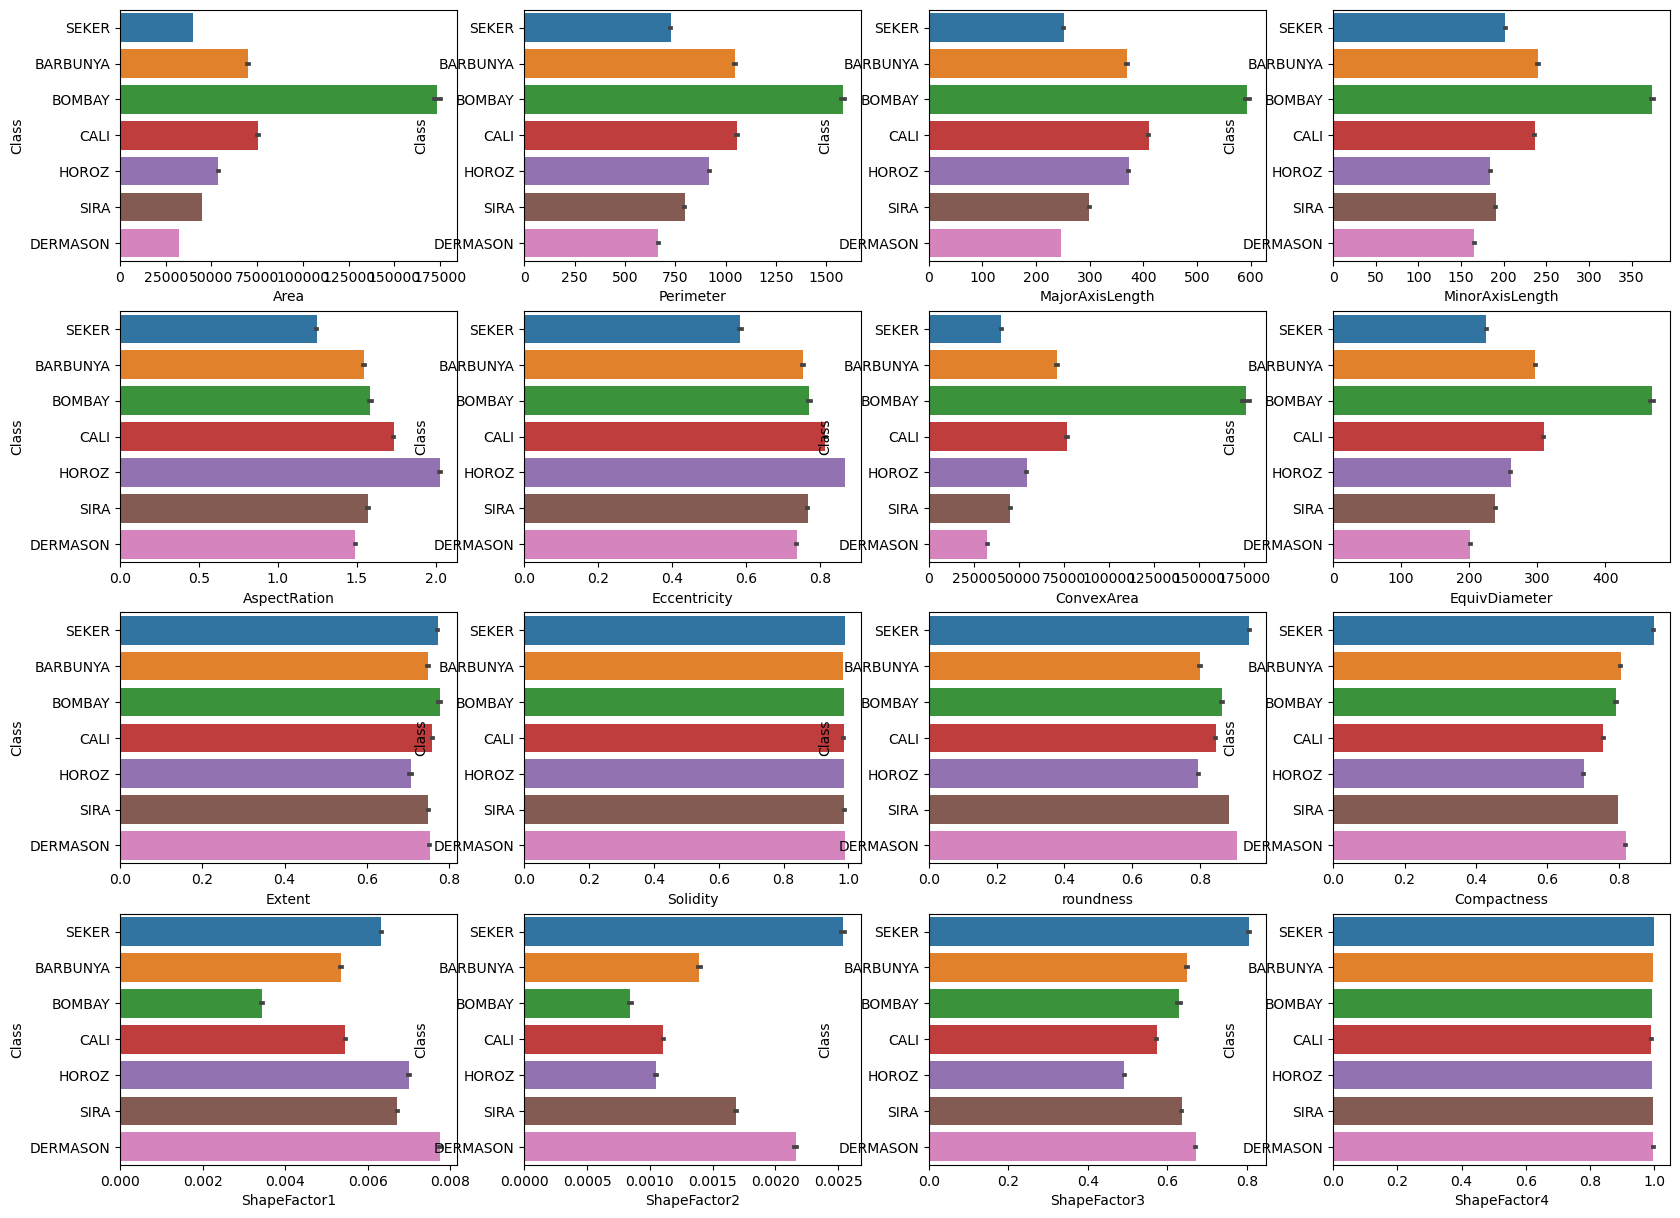

In [65]:
plt.figure(figsize=(20,15))
for i,column in enumerate(fv.columns):
    plt.subplot(4,4,i+1)
    sns.barplot(fv[column],cv)
plt.show()

## Pre Processing

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\li

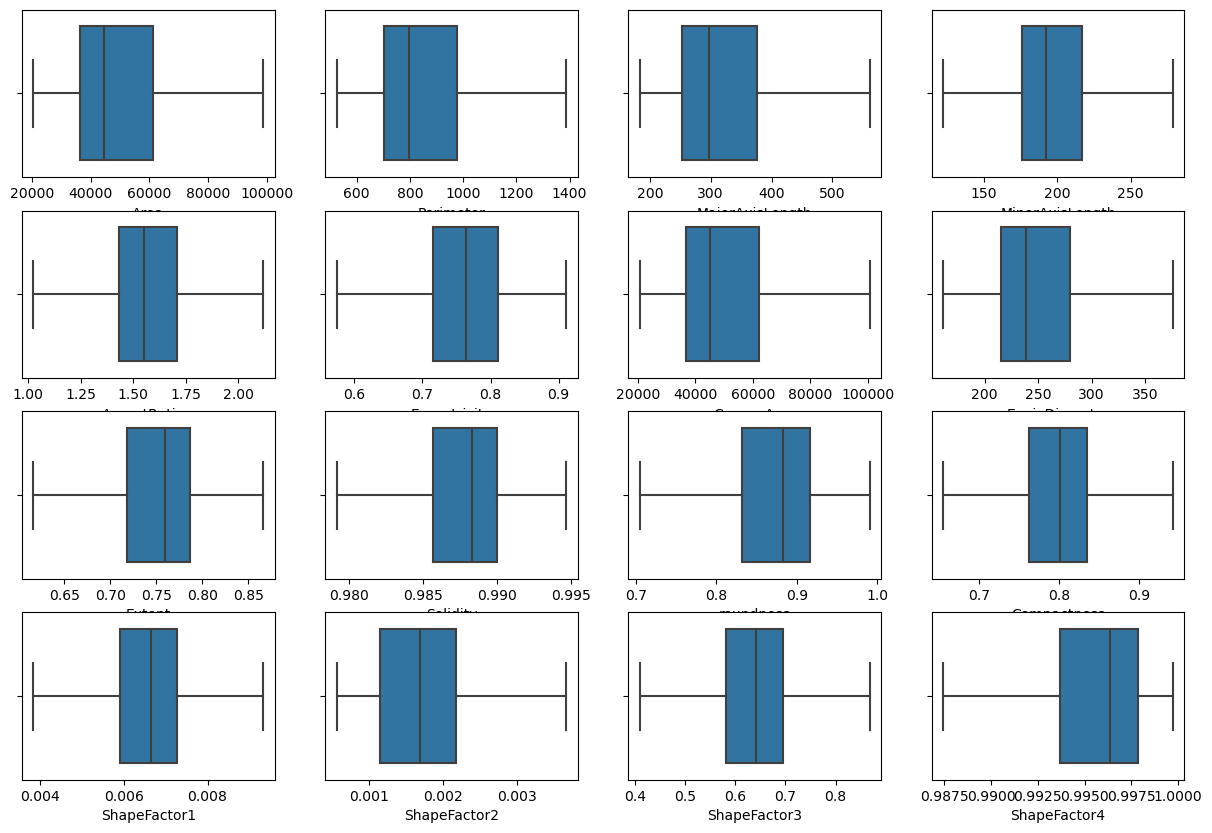

In [66]:
## Remove outliers using IQR method
plt.figure(figsize=(15,10))
for i,column in enumerate(fv.columns):
    IQR=fv[column].quantile(0.75)-fv[column].quantile(0.25)
    upper_limit=fv[column].quantile(0.75)+1.5*IQR
    lower_limit=fv[column].quantile(0.25)-1.5*IQR
    fv[column]=np.clip(fv[column],lower_limit,upper_limit)
    plt.subplot(4,4,i+1)
    sns.boxplot(fv[column])
plt.show()
   

In [67]:
## Selecting the important features from the Basic EDA

del fv['Extent']
del fv['Solidity']
del fv['ShapeFactor4']
del fv['roundness']
del fv['Compactness']

In [68]:
fv

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395.0    610.291       208.178117       173.888747      1.197191   
1      28734.0    638.018       200.524796       182.734419      1.097356   
2      29380.0    624.110       212.826130       175.931143      1.209713   
3      30008.0    645.884       210.557999       182.516516      1.153638   
4      30140.0    620.134       201.847882       190.279279      1.060798   
...        ...        ...              ...              ...           ...   
13606  42097.0    759.696       288.721612       185.944705      1.552728   
13607  42101.0    757.499       281.576392       190.713136      1.476439   
13608  42139.0    759.321       281.539928       191.187979      1.472582   
13609  42147.0    763.779       283.382636       190.275731      1.489326   
13610  42159.0    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter  ShapeFactor1  ShapeFactor2  \
0          0.574120     28715.0     190.141097      0.007332      0.003147   
1          0.574120     29172.0     191.272751      0.006979      0.003564   
2          0.574120     29690.0     193.410904      0.007244      0.003048   
3          0.574120     30724.0     195.467062      0.007017      0.003215   
4          0.574120     30417.0     195.896503      0.006697      0.003665   
...             ...         ...            ...           ...           ...   
13606      0.765002     42508.0     231.515799      0.006858      0.001749   
13607      0.735702     42494.0     231.526798      0.006688      0.001886   
13608      0.734065     42569.0     231.631261      0.006681      0.001888   
13609      0.741055     42667.0     231.653247      0.006724      0.001852   
13610      0.786693     42600.0     231.686223      0.007001      0.001640   

       ShapeFactor3  
0          0.834222  
1          0.867978  
2          0.825871  
3          0.861794  
4          0.867978  
...             ...  
13606      0.642988  
13607      0.676099  
13608      0.676884  
13609      0.668237  
13610      0.616221  

[13611 rows x 11 columns]

## EDA

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


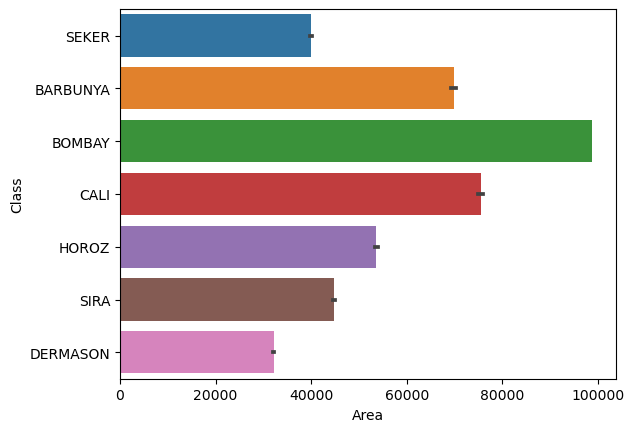

In [69]:
sns.barplot(fv['Area'],cv)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


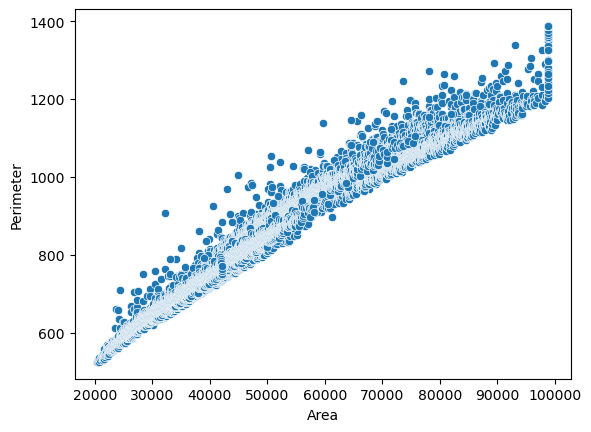

In [70]:
sns.scatterplot(fv['Area'],fv['Perimeter'])
plt.show()

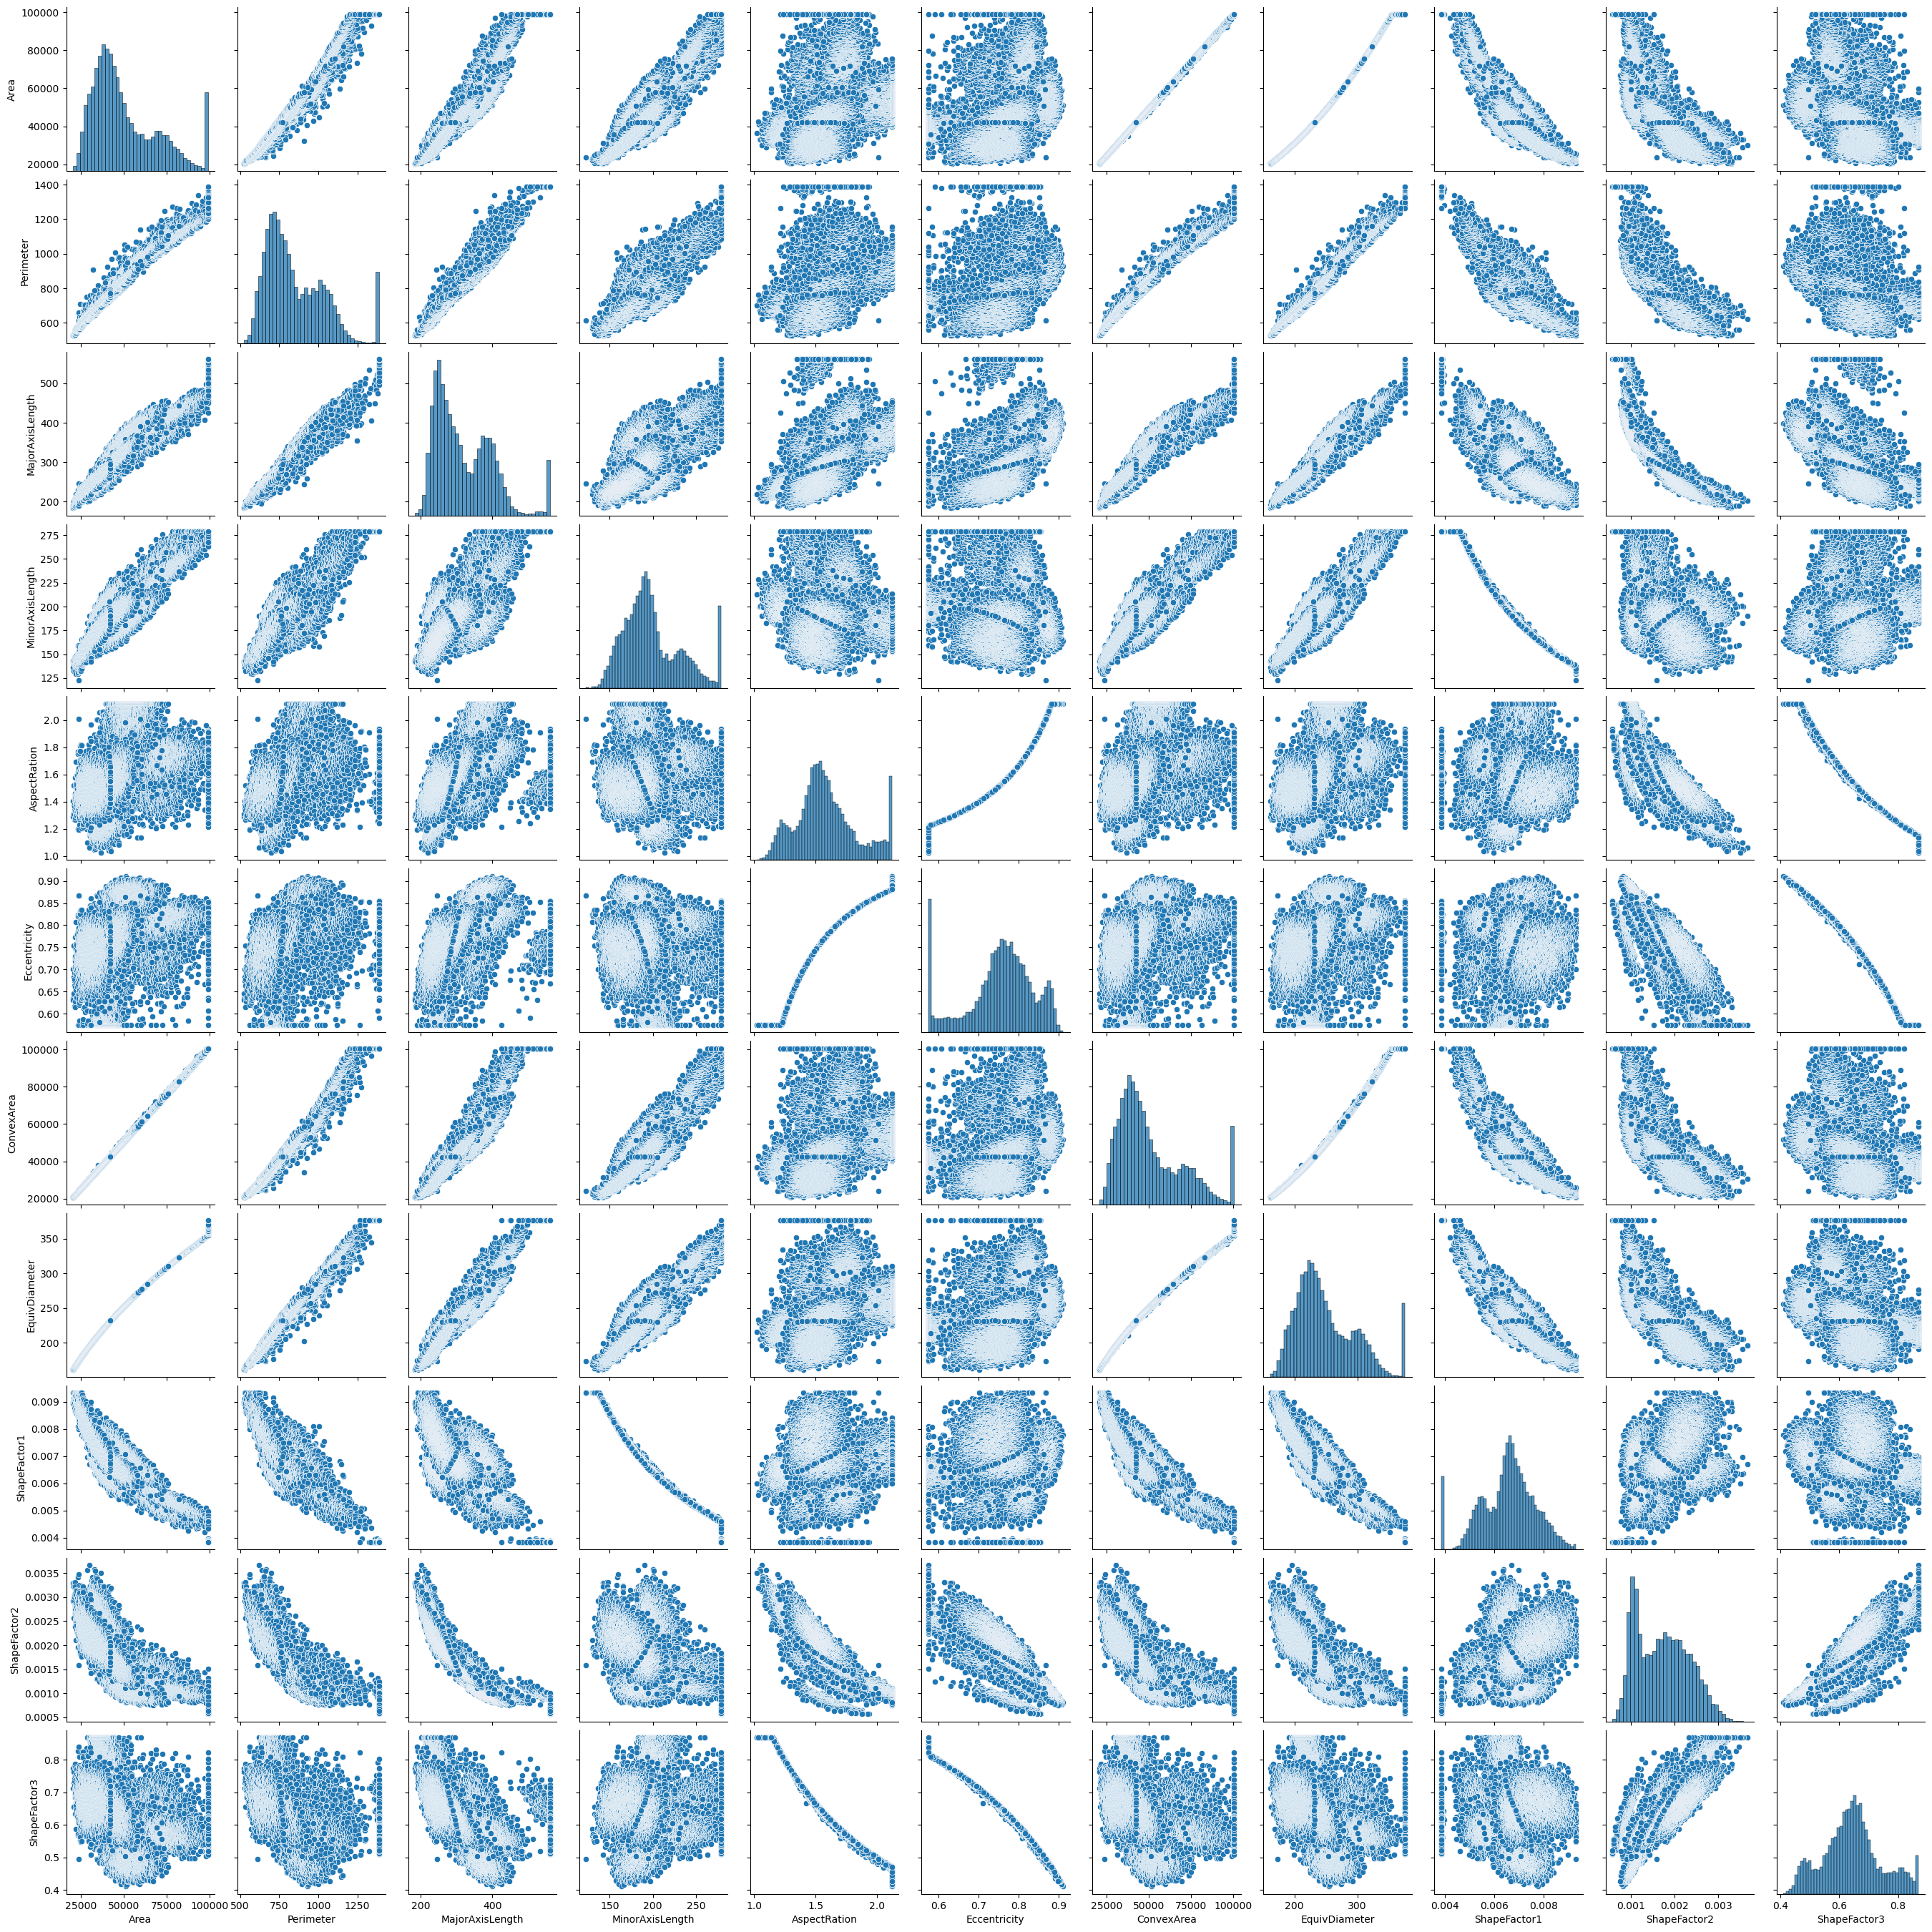

In [71]:
sns.pairplot(fv)

In [72]:
## Divide the feature variables into train and test data

x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1,stratify=cv)

In [73]:
## Applying Normalization

norm=MinMaxScaler()
x_train=norm.fit_transform(x_train)
x_test=norm.transform(x_test)

In [74]:
x_train=pd.DataFrame(x_train,columns=fv.columns)

## brute force

In [120]:
## Applying Stratified fold method and finding the range of best fit using overfitting and underfitting
## Using brute force , p=1(Manhattan distance)

sf=StratifiedKFold(n_splits=5)
k=[]
train_error=[]
cv_error=[]

for i in range(1,70,2):
    k.append(i)
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=1,algorithm='brute')
        model=knn.fit(x_trainf,y_trainf)
    
    ## training error
    pred_t=model.predict(x_trainf)
    train_error.append(1-accuracy_score(y_trainf,pred_t))
    
    ## test error
    pred_cv=model.predict(x_cv)
    cv_error.append(1-accuracy_score(y_cv,pred_cv))

    

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

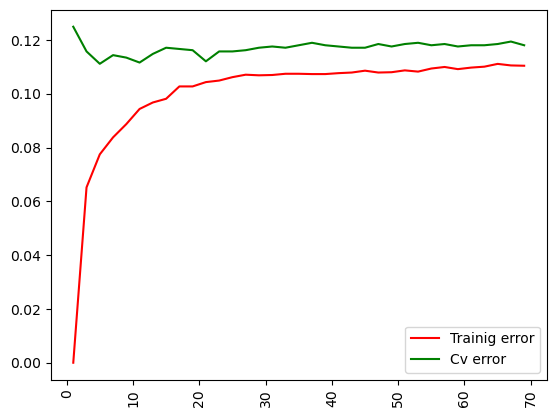

In [121]:
## Plotting training error and testing error

plt.plot(k,train_error,label='Trainig error',color='r')
plt.plot(k,cv_error,label='Cv error',color='g')
plt.xticks(rotation=90,ha='center')
plt.legend()

In [90]:
## Finding the accuracy of each K

sf=StratifiedKFold(n_splits=5)
acc_f=[]
k=[]
for i in range(1,10,2):
    k.append(i)
    acc=[]
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=1,algorithm='brute')
        model=knn.fit(x_trainf,y_trainf)
        predicted=model.predict(x_cv)
        acc.append(accuracy_score(y_cv,predicted))
    acc_f.append(np.mean(np.array(acc)))
        

    

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [91]:
acc_f

[0.8765616240915861,
 0.8897872110675384,
 0.8912567019845593,
 0.8904297073545833,
 0.8905218721646667]

In [92]:
## Testing/Evaluation

knn=KNeighborsClassifier(n_neighbors=5)
training_start_time=time.time()
model=knn.fit(x_trainf,y_trainf)
training_end_time=time.time()
test_start_time=time.time()
prediction=model.predict(x_test)
test_time_end=time.time()
acc=accuracy_score(y_test,prediction)
print('Generalized Accuracy is:',acc)
Training_time=training_end_time-training_start_time
Testing_time=test_time_end-test_start_time
print('Training time for brute force using Manhattan distance is:',Training_time)
print('Testing time for brute force using Manhattan distance is:',Testing_time)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Generalized Accuracy is: 0.9085567388909291
Training time for brute force using Manhattan distance is: 0.048984527587890625
Testing time for brute force using Manhattan distance is: 0.2221536636352539


In [94]:
## Using brute force and P=2 ,Euclidean distance

sf=StratifiedKFold(n_splits=5)
k=[]
train_error=[]
cv_error=[]

for i in range(1,70,2):
    k.append(i)
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=2,algorithm='brute')
        model=knn.fit(x_trainf,y_trainf)
    
    ## training error
    pred_t=model.predict(x_trainf)
    train_error.append(1-accuracy_score(y_trainf,pred_t))
    
    ## test error
    pred_cv=model.predict(x_cv)
    cv_error.append(1-accuracy_score(y_cv,pred_cv))


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

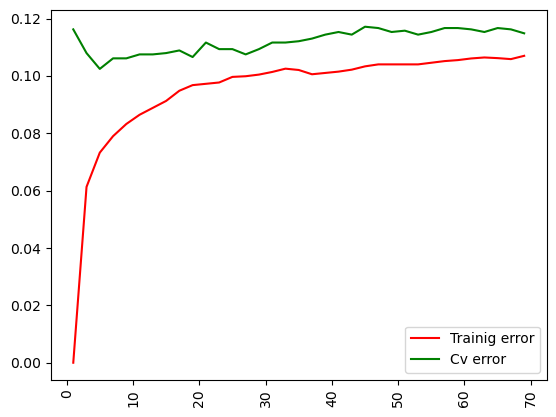

In [95]:
## Plotting training error and testing error

plt.plot(k,train_error,label='Trainig error',color='r')
plt.plot(k,cv_error,label='Cv error',color='g')
plt.xticks(rotation=90,ha='center')
plt.legend()

In [96]:
# Finding the accuracy using K value

sf=StratifiedKFold(n_splits=5)
acc_f=[]
k=[]
for i in range(1,20,2):
    k.append(i)
    acc=[]
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=2,algorithm='brute')
        model=knn.fit(x_trainf,y_trainf)
        predicted=model.predict(x_cv)
        acc.append(accuracy_score(y_cv,predicted))
    acc_f.append(np.mean(np.array(acc)))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [97]:
acc_f

[0.8817053062887613,
 0.8975024390984636,
 0.9026457416694189,
 0.8994308981154934,
 0.8991552051183739,
 0.8981450197468905,
 0.8966756975526342,
 0.8983288010180731,
 0.8962160545615676,
 0.8961245646425418]

In [98]:
## Testing/Evaluation

knn=KNeighborsClassifier(n_neighbors=5)
training_start_time=time.time()
model=knn.fit(x_trainf,y_trainf)
training_end_time=time.time()
test_start_time=time.time()
prediction=model.predict(x_test)
test_time_end=time.time()
acc=accuracy_score(y_test,prediction)
print('Generalized Accuracy is:',acc)
Training_time=training_end_time-training_start_time
Testing_time=test_time_end-test_start_time
print('Training time for brute force using Euclidean distance is:',Training_time)
print('Testing time for brute force using Euclidean distance is:',Testing_time)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Generalized Accuracy is: 0.9085567388909291
Training time for brute force using Euclidean distance is: 0.05280733108520508
Testing time for brute force using Euclidean distance is: 0.21913790702819824


## Kdtree

In [99]:
## Kd tree ,using Manhattan distance(p=1)


sf=StratifiedKFold(n_splits=5)
k=[]
train_error=[]
cv_error=[]

for i in range(1,70,2):
    k.append(i)
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=1,algorithm='kd_tree')
        model=knn.fit(x_trainf,y_trainf)
    
    ## training error
    pred_t=model.predict(x_trainf)
    train_error.append(1-accuracy_score(y_trainf,pred_t))
    
    ## test error
    pred_cv=model.predict(x_cv)
    cv_error.append(1-accuracy_score(y_cv,pred_cv))


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

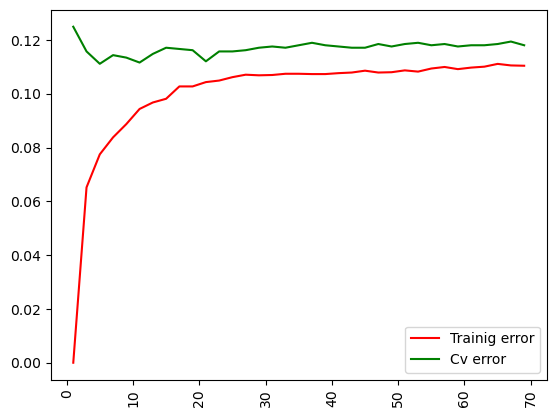

In [100]:
## Plotting training error and testing error

plt.plot(k,train_error,label='Trainig error',color='r')
plt.plot(k,cv_error,label='Cv error',color='g')
plt.xticks(rotation=90,ha='center')
plt.legend()

In [101]:
# Finding the accuracy using K value

sf=StratifiedKFold(n_splits=5)
acc_f=[]
k=[]
for i in range(1,15,2):
    k.append(i)
    acc=[]
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=1,algorithm='kd_tree')
        model=knn.fit(x_trainf,y_trainf)
        predicted=model.predict(x_cv)
        acc.append(accuracy_score(y_cv,predicted))
    acc_f.append(np.mean(np.array(acc)))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [102]:
acc_f

[0.8765616240915861,
 0.8897872110675384,
 0.8912567019845593,
 0.8904297073545833,
 0.8905218721646667,
 0.8906141213361325,
 0.888593413147637]

In [103]:
## Testing/Evaluation

knn=KNeighborsClassifier(n_neighbors=5)
training_start_time=time.time()
model=knn.fit(x_trainf,y_trainf)
training_end_time=time.time()
test_start_time=time.time()
prediction=model.predict(x_test)
test_time_end=time.time()
acc=accuracy_score(y_test,prediction)
print('Generalized Accuracy is:',acc)
Training_time=training_end_time-training_start_time
Testing_time=test_time_end-test_start_time
print('Training time for kd tree using Manhattan distance is:',Training_time)
print('Testing time for kd tree using Manhattan distance is:',Testing_time)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Generalized Accuracy is: 0.9085567388909291
Training time for kd tree using Manhattan distance is: 0.05634617805480957
Testing time for kd tree using Manhattan distance is: 0.2150888442993164


In [122]:
## kdtree using Euclidean distance(p=2)

sf=StratifiedKFold(n_splits=5)
k=[]
train_error=[]
cv_error=[]

for i in range(1,70,2):
    k.append(i)
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=2,algorithm='kd_tree')
        model=knn.fit(x_trainf,y_trainf)
    
    ## training error
    pred_t=model.predict(x_trainf)
    train_error.append(1-accuracy_score(y_trainf,pred_t))
    
    ## test error
    pred_cv=model.predict(x_cv)
    cv_error.append(1-accuracy_score(y_cv,pred_cv))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

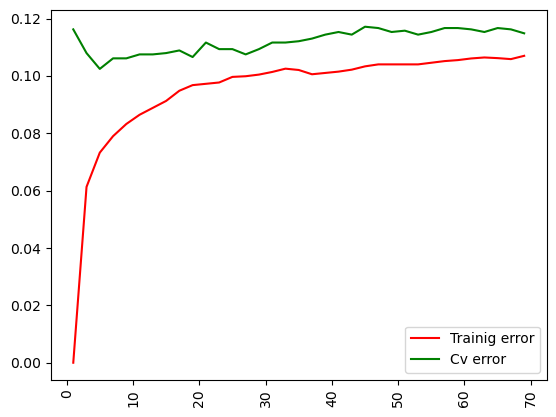

In [123]:
## Plotting training error and testing error

plt.plot(k,train_error,label='Trainig error',color='r')
plt.plot(k,cv_error,label='Cv error',color='g')
plt.xticks(rotation=90,ha='center')
plt.legend()

In [124]:
# Finding the accuracy using K value

sf=StratifiedKFold(n_splits=5)
acc_f=[]
k=[]
for i in range(1,10,2):
    k.append(i)
    acc=[]
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=2,algorithm='kd_tree')
        model=knn.fit(x_trainf,y_trainf)
        predicted=model.predict(x_cv)
        acc.append(accuracy_score(y_cv,predicted))
    acc_f.append(np.mean(np.array(acc)))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [125]:
acc_f

[0.8817053062887613,
 0.8975024390984636,
 0.9026457416694189,
 0.8994308981154934,
 0.8991552051183739]

In [126]:
## Testing/Evaluation

knn=KNeighborsClassifier(n_neighbors=5)
training_start_time=time.time()
model=knn.fit(x_trainf,y_trainf)
training_end_time=time.time()
test_start_time=time.time()
prediction=model.predict(x_test)
test_time_end=time.time()
acc=accuracy_score(y_test,prediction)
print('Generalized Accuracy is:',acc)
Training_time=training_end_time-training_start_time
Testing_time=test_time_end-test_start_time
print('Training time for kd tree using Euclidean distance is:',Training_time)
print('Testing time for kd tree using Euclidean distance is:',Testing_time)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Generalized Accuracy is: 0.9085567388909291
Training time for kd tree using Euclidean distance is: 0.058506011962890625
Testing time for kd tree using Euclidean distance is: 0.2231454849243164


## Ball tree

In [110]:
## Ball tree using Manhattan distance(p=1)

sf=StratifiedKFold(n_splits=5)
k=[]
train_error=[]
cv_error=[]

for i in range(1,70,2):
    k.append(i)
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=1,algorithm='ball_tree')
        model=knn.fit(x_trainf,y_trainf)
    
    ## training error
    pred_t=model.predict(x_trainf)
    train_error.append(1-accuracy_score(y_trainf,pred_t))
    
    ## test error
    pred_cv=model.predict(x_cv)
    cv_error.append(1-accuracy_score(y_cv,pred_cv))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

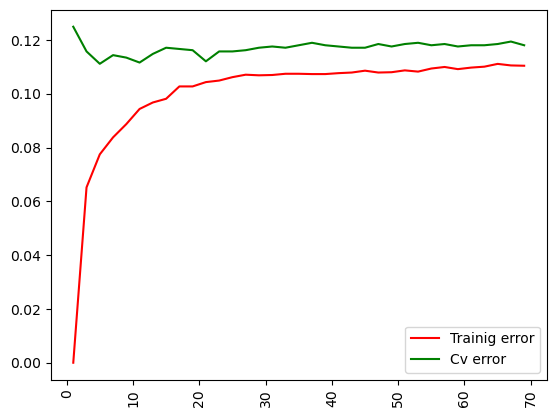

In [111]:
## Plotting training error and testing error

plt.plot(k,train_error,label='Trainig error',color='r')
plt.plot(k,cv_error,label='Cv error',color='g')
plt.xticks(rotation=90,ha='center')
plt.legend()

In [112]:
# Finding the accuracy using K value

sf=StratifiedKFold(n_splits=5)
acc_f=[]
k=[]
for i in range(1,10,2):
    k.append(i)
    acc=[]
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=1,algorithm='ball_tree')
        model=knn.fit(x_trainf,y_trainf)
        predicted=model.predict(x_cv)
        acc.append(accuracy_score(y_cv,predicted))
    acc_f.append(np.mean(np.array(acc)))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [113]:
acc_f

[0.8765616240915861,
 0.8897872110675384,
 0.8912567019845593,
 0.8904297073545833,
 0.8905218721646667]

In [114]:
## Testing/Evaluation

knn=KNeighborsClassifier(n_neighbors=5)
training_start_time=time.time()
model=knn.fit(x_trainf,y_trainf)
training_end_time=time.time()
test_start_time=time.time()
prediction=model.predict(x_test)
test_time_end=time.time()
acc=accuracy_score(y_test,prediction)
print('Generalized Accuracy is:',acc)
Training_time=training_end_time-training_start_time
Testing_time=test_time_end-test_start_time
print('Training time for ball tree using Manhattan distance is:',Training_time)
print('Testing time for ball tree using Manhattan distance is:',Testing_time)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Generalized Accuracy is: 0.9085567388909291
Training time for ball tree using Manhattan distance is: 0.048085689544677734
Testing time for ball tree using Manhattan distance is: 0.23208260536193848


In [115]:
## ball tree using Euclidean distance(p=2)


sf=StratifiedKFold(n_splits=5)
k=[]
train_error=[]
cv_error=[]

for i in range(1,70,2):
    k.append(i)
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=2,algorithm='ball_tree')
        model=knn.fit(x_trainf,y_trainf)
    
    ## training error
    pred_t=model.predict(x_trainf)
    train_error.append(1-accuracy_score(y_trainf,pred_t))
    
    ## test error
    pred_cv=model.predict(x_cv)
    cv_error.append(1-accuracy_score(y_cv,pred_cv))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

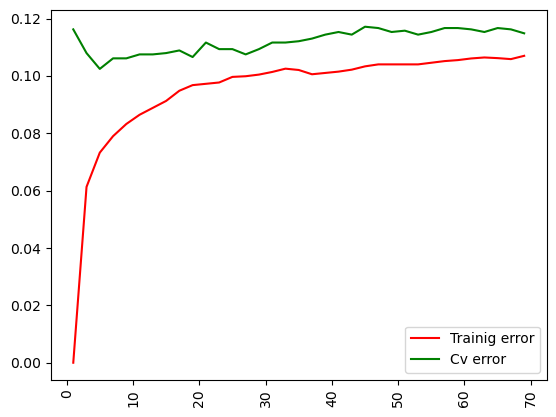

In [116]:
## Plotting training error and testing error

plt.plot(k,train_error,label='Trainig error',color='r')
plt.plot(k,cv_error,label='Cv error',color='g')
plt.xticks(rotation=90,ha='center')
plt.legend()

In [117]:
# Finding the accuracy using K value

sf=StratifiedKFold(n_splits=5)
acc_f=[]
k=[]
for i in range(1,10,2):
    k.append(i)
    acc=[]
    for train_index,cv_index in sf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=2,algorithm='ball_tree')
        model=knn.fit(x_trainf,y_trainf)
        predicted=model.predict(x_cv)
        acc.append(accuracy_score(y_cv,predicted))
    acc_f.append(np.mean(np.array(acc)))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [118]:
acc_f

[0.8817053062887613,
 0.8975024390984636,
 0.9026457416694189,
 0.8994308981154934,
 0.8991552051183739]

In [119]:
## Testing/Evaluation

knn=KNeighborsClassifier(n_neighbors=5)
training_start_time=time.time()
model=knn.fit(x_trainf,y_trainf)
training_end_time=time.time()
test_start_time=time.time()
prediction=model.predict(x_test)
test_time_end=time.time()
acc=accuracy_score(y_test,prediction)
print('Generalized Accuracy is:',acc)
Training_time=training_end_time-training_start_time
Testing_time=test_time_end-test_start_time
print('Training time for ball tree using Euclidean distance is:',Training_time)
print('Testing time for ball tree using Euclidean distance is:',Testing_time)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Generalized Accuracy is: 0.9085567388909291
Training time for ball tree using Euclidean distance is: 0.0589754581451416
Testing time for ball tree using Euclidean distance is: 0.1964282989501953


In [127]:
time.time()

1710049078.6116982

In [128]:
time.time()

1710049159.3123057